In [68]:
# CELL 1 by Mike Grad
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# CELL 2 by Mike Grad
# Assign file paths

# Commented out causes and causes_df throughout code because none of the cause codes in the reference table
# are in the raw datafile. When merging, all rows have NaN for those columns.
file_one = "Resources/Morticd10_part1"
file_two = "Resources/Morticd10_part2"
country_codes = "Resources/country_codes"
population = "Resources/pop"
#causes = "Resources/causes_master_list_final.csv"
sex = "Resources/sex_reference_table.csv"

# open raw mortality data files and merge them
file_one_df = pd.read_csv(file_one, encoding="utf-8")
file_two_df = pd.read_csv(file_two, encoding="utf-8")
country_codes_df = pd.read_csv(country_codes, encoding="utf-8")
population_df = pd.read_csv(population, encoding="utf-8")
#causes_df = pd.read_csv(causes, encoding="utf-8")
sex_df = pd.read_csv(sex, encoding="utf-8")

len(file_one_df)
type(file_one_df)
file_one_df.head()
len(file_one_df)

# verify all columns for file_one_df and file_two_df are identical
columns_one = file_one_df.columns
columns_two = file_two_df.columns

# visually compare column headers. verified all column headers are identical and appear in the same sequence.
print(columns_one)
print(columns_two)

# DO NOT remove header row from file_two_df





file_one_df.head()

# assign df to merged data

C:\Users\small\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\small\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Deaths4'],
      dtype='object')
Index(['Country', 'Admin1', 'SubDiv', 'Year', 'List', 'Cause', 'Sex', 'Frmat',
       'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5',
       'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11',
       'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17',
       'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23',
       'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1', 'IM_Deaths2',
       'IM_Deaths3', 'IM_Dea

Country  Admin1  SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  Deaths1  \
0     1400     NaN     NaN  2001  101  1000    1      7         8      332   
1     1400     NaN     NaN  2001  101  1000    2      7         8      222   
2     1400     NaN     NaN  2001  101  1001    1      7         8       24   
3     1400     NaN     NaN  2001  101  1001    2      7         8       14   
4     1400     NaN     NaN  2001  101  1002    1      7         8        0   

   ...  Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0  ...      95.0       NaN       NaN       NaN       NaN       0.0   
1  ...     112.0       NaN       NaN       NaN       NaN       0.0   
2  ...       5.0       NaN       NaN       NaN       NaN       0.0   
3  ...       6.0       NaN       NaN       NaN       NaN       0.0   
4  ...       0.0       NaN       NaN       NaN       NaN       0.0   

   IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4  
0         8.0         NaN         NaN         NaN  
1        11.0         NaN         NaN         NaN  
2         0.0         NaN         NaN         NaN  
3         0.0         NaN         NaN         NaN  
4         0.0         NaN         NaN         NaN  

[5 rows x 39 columns]

In [5]:
# CELL 3 by Mike Grad
# combine file_one_df and file_two_df data
# Sourced from https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
raw_tables = [file_one_df, file_two_df]
combined_data_df = pd.concat(raw_tables)

combined_data_df.head()
len(combined_data_df)

3945138

In [6]:
# CELL 4 by Mike Grad
# merge country codes into combined_data_df
country_codes_df.head()

country_codes_df = country_codes_df.rename(columns={"country": "Country"})
combined_data_df = pd.merge(combined_data_df, country_codes_df, on="Country", how="left")

# DEBUG!! name not renamed to Country Name
country_codes_df = combined_data_df.rename(columns={"name": "Country Name"})
combined_data_df

Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
0           1400     NaN    NaN  2001  101  1000    1      7         8   
1           1400     NaN    NaN  2001  101  1000    2      7         8   
2           1400     NaN    NaN  2001  101  1001    1      7         8   
3           1400     NaN    NaN  2001  101  1001    2      7         8   
4           1400     NaN    NaN  2001  101  1002    1      7         8   
...          ...     ...    ...   ...  ...   ...  ...    ...       ...   
3945133     4070     NaN    NaN  2017  103   Y86    1      2         1   
3945134     4070     NaN    NaN  2017  103   Y86    2      2         1   
3945135     4070     NaN    NaN  2017  103   Y87    1      2         1   
3945136     4070     NaN    NaN  2017  103   Y87    2      2         1   
3945137     4070     NaN    NaN  2017  103   Y89    1      2         1   

         Deaths1  ...  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
0            332  ...       NaN       NaN       NaN       NaN       0.0   
1            222  ...       NaN       NaN       NaN       NaN       0.0   
2             24  ...       NaN       NaN       NaN       NaN       0.0   
3             14  ...       NaN       NaN       NaN       NaN       0.0   
4              0  ...       NaN       NaN       NaN       NaN       0.0   
...          ...  ...       ...       ...       ...       ...       ...   
3945133       39  ...       4.0       4.0       NaN       NaN       0.0   
3945134       20  ...       3.0       9.0       NaN       NaN       0.0   
3945135        2  ...       0.0       0.0       NaN       NaN       0.0   
3945136        2  ...       0.0       0.0       NaN       NaN       0.0   
3945137        1  ...       0.0       1.0       NaN       NaN       0.0   

         IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4        name  
0               8.0         NaN         NaN         NaN  Seychelles  
1              11.0         NaN         NaN         NaN  Seychelles  
2               0.0         NaN         NaN         NaN  Seychelles  
3               0.0         NaN         NaN         NaN  Seychelles  
4               0.0         NaN         NaN         NaN  Seychelles  
...             ...         ...         ...         ...         ...  
3945133         0.0         0.0         0.0         0.0     Finland  
3945134         0.0         0.0         0.0         0.0     Finland  
3945135         0.0         0.0         0.0         0.0     Finland  
3945136         0.0         0.0         0.0         0.0     Finland  
3945137         0.0         0.0         0.0         0.0     Finland  

[3945138 rows x 40 columns]

In [7]:
# CELL 5 by Mike Grad
# Create dataframe with only the rows of the countries of interest:  United States of America, Canada, United Kingdom, New Zealand, and Brazil.  India and China are not in the extracted dataset.

# Extract list of countires in combined_data_df
countries_list = combined_data_df["name"].unique()
countries_df = pd.DataFrame(countries_list)
countries_df

# DEBUG!! how to resort when column header = 0
#countries_df = countries_df.sort_values()

# Verify spelling for countries of interest by exporting full list of countries and inspecting csv
countries_df.to_csv("Output/countries.csv", index=False, header=True)

country_filtered_df = combined_data_df.loc[(combined_data_df["name"] == "United States of America") | (combined_data_df["name"] == "Canada") |
                                          (combined_data_df["name"] == "United Kingdom") | (combined_data_df["name"] == "New Zealand") |
                                          (combined_data_df["name"] == "Brazil"), :]

country_filtered_df

# 578025 rows
print(len(country_filtered_df))

# export df to csv and inspect in XL
country_filtered_df.to_csv("Output/country_filtered_raw_data.csv", index=False, header=True)

# drop na
# 0 rows left if do a dropna
country_filtered_nona_df = country_filtered_df.dropna()

# DEBUG!!
# replace NaN values with ""
country_filtered_df

# Test if sum and mean will work with NaN values in some of the columns - test on IM_Deaths2 (which has NaN entries for brazil)
# Visual inspection of the data in MS Excel showed no string values in columns containing mortality numbers
#country_filtered_df["IM_Deaths2"].mean()

#country_filtered_df["Total"] = ""

#for i in range(len(country_filtered_df["IM_Deaths1"])):
#    country_filtered_df.iloc[i, -1] = country_filtered_df.iloc[i, -6] + country_filtered_df.iloc[i, -5] + country_filtered_df.iloc[i, -4] + country_filtered_df.iloc[i, -3]

country_filtered_df

578025


Country  Admin1 SubDiv  Year List Cause  Sex  Frmat  IM_Frmat  \
183198      2070     NaN    NaN  1996  104  A000    1      0         8   
183199      2070     NaN    NaN  1996  104  A001    1      0         8   
183200      2070     NaN    NaN  1996  104  A001    2      0         8   
183201      2070     NaN    NaN  1996  104  A009    1      0         8   
183202      2070     NaN    NaN  1996  104  A009    2      0         8   
...          ...     ...    ...   ...  ...   ...  ...    ...       ...   
3901606     2070     NaN    NaN  2017  104  Y883    1      0         8   
3901607     2070     NaN    NaN  2017  104  Y883    2      0         8   
3901608     2070     NaN    NaN  2017  104  Y890    2      0         8   
3901609     2070     NaN    NaN  2017  104  Y899    1      0         8   
3901610     2070     NaN    NaN  2017  104  Y899    2      0         8   

         Deaths1  ...  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  \
183198         1  ...       0.0       0.0       0.0       0.0       0.0   
183199         1  ...       0.0       0.0       0.0       0.0       0.0   
183200         2  ...       0.0       0.0       0.0       0.0       0.0   
183201        13  ...       1.0       1.0       0.0       0.0       0.0   
183202         3  ...       0.0       0.0       1.0       0.0       0.0   
...          ...  ...       ...       ...       ...       ...       ...   
3901606       25  ...       4.0       1.0       1.0       0.0       0.0   
3901607       26  ...       2.0       2.0       2.0       2.0       0.0   
3901608        1  ...       0.0       0.0       0.0       0.0       0.0   
3901609       56  ...       5.0       5.0       0.0       1.0       0.0   
3901610       21  ...       1.0       4.0       2.0       3.0       1.0   

         IM_Deaths1  IM_Deaths2  IM_Deaths3  IM_Deaths4    name  
183198          0.0         NaN         NaN         NaN  Brazil  
183199          0.0         NaN         NaN         NaN  Brazil  
183200          0.0         NaN         NaN         NaN  Brazil  
183201          0.0         NaN         NaN         NaN  Brazil  
183202          0.0         NaN         NaN         NaN  Brazil  
...             ...         ...         ...         ...     ...  
3901606         0.0         NaN         NaN         NaN  Brazil  
3901607         0.0         NaN         NaN         NaN  Brazil  
3901608         0.0         NaN         NaN         NaN  Brazil  
3901609         0.0         NaN         NaN         NaN  Brazil  
3901610         0.0         NaN         NaN         NaN  Brazil  

[578025 rows x 40 columns]

In [8]:
# CELL 5.01
# Merge in population info

# DEBUG!! -- merging changes len from 578,025 rows to 6,244,231 rows -- WHY???
#country_codes_df = country_codes_df.rename(columns={"country": "Country"})
age_adj_df = pd.merge(combined_data_df, population_df, on=["Country", "Year"], how="left")

age_adj_df.columns

Index(['Country', 'Admin1_x', 'SubDiv_x', 'Year', 'List', 'Cause', 'Sex_x',
       'Frmat_x', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16',
       'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22',
       'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1',
       'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4', 'name', 'Admin1_y',
       'SubDiv_y', 'Sex_y', 'Frmat_y', 'Pop1', 'Pop2', 'Pop3', 'Pop4', 'Pop5',
       'Pop6', 'Pop7', 'Pop8', 'Pop9', 'Pop10', 'Pop11', 'Pop12', 'Pop13',
       'Pop14', 'Pop15', 'Pop16', 'Pop17', 'Pop18', 'Pop19', 'Pop20', 'Pop21',
       'Pop22', 'Pop23', 'Pop24', 'Pop25', 'Pop26', 'Lb'],
      dtype='object')

In [9]:
# CELL 5.01b
# Verify pop columns do not have nan values


# Deaths1 (all) = 0
# Deaths2 (year 0) = 4484
# Deaths3 (year 1) = 4484
# Deaths4 (year 2) = 330281
# Deaths5 (year 3) = 330281
# Deaths6 (year 4) = 330281
# Deaths7 (years 5-9) = 4484
# Deaths8 (years 10-14) = 9260
# Deaths9 (years 15-19) = 4484
# Deaths10 (years 20-24) = 9260
# Deaths11 (years 25-29) = 4484
# Deaths12 (years 30-34) = 9260
# Deaths13 (years 35-39) = 4484
# Deaths14 (years 40-44) = 9260
# Deaths15 (years 45-49) = 4484
# Deaths16 (years 50-54) = 9260
# Deaths17 (years 55-59) = 4484
# Deaths18 (years 60-64) = 9260
# Deaths19 (years 61-69) = 4484
# Deaths20 (years 70-74) = 9584
# Deaths21 (years 75-79) = 4808
# Deaths22 (years 80-84) = 27151
# Deaths23 (years 85-89) = 27151
# Deaths24 (years 90-94) = 913599
# Deaths25 (years 95 and up) = 913599
# Deaths26 (age unspecified) = 4484

# Country = 0
# Year = 0
# List = 0
# Cause = 0
# Sex = 0
age_adj_df['Deaths26'].isnull().sum()
len(age_adj_df)

6244231

In [10]:
# CELL 5.02
# Create age adjusted death rates (deaths per 1000 people)

# 
age_adj_df["age_adj_death1"] = age_adj_df["Deaths1"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death2"] = age_adj_df["Deaths2"] * age_adj_df["Pop2"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death3"] = age_adj_df["Deaths3"] * age_adj_df["Pop3"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death4"] = age_adj_df["Deaths4"] * age_adj_df["Pop4"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death5"] = age_adj_df["Deaths5"] * age_adj_df["Pop5"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death6"] = age_adj_df["Deaths6"] * age_adj_df["Pop6"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death7"] = age_adj_df["Deaths7"] * age_adj_df["Pop7"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death8"] = age_adj_df["Deaths8"] * age_adj_df["Pop8"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death9"] = age_adj_df["Deaths9"] * age_adj_df["Pop9"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death10"] = age_adj_df["Deaths10"] * age_adj_df["Pop10"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death11"] = age_adj_df["Deaths11"] * age_adj_df["Pop11"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death12"] = age_adj_df["Deaths12"] * age_adj_df["Pop12"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death13"] = age_adj_df["Deaths13"] * age_adj_df["Pop13"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death14"] = age_adj_df["Deaths14"] * age_adj_df["Pop14"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death15"] = age_adj_df["Deaths15"] * age_adj_df["Pop15"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death16"] = age_adj_df["Deaths16"] * age_adj_df["Pop16"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death17"] = age_adj_df["Deaths17"] * age_adj_df["Pop17"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death18"] = age_adj_df["Deaths18"] * age_adj_df["Pop18"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death19"] = age_adj_df["Deaths19"] * age_adj_df["Pop19"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death20"] = age_adj_df["Deaths20"] * age_adj_df["Pop20"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death21"] = age_adj_df["Deaths21"] * age_adj_df["Pop21"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death22"] = age_adj_df["Deaths22"] * age_adj_df["Pop22"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death23"] = age_adj_df["Deaths23"] * age_adj_df["Pop23"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death24"] = age_adj_df["Deaths24"] * age_adj_df["Pop24"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death25"] = age_adj_df["Deaths25"] * age_adj_df["Pop25"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_death26"] = age_adj_df["Deaths26"] * age_adj_df["Pop26"] / age_adj_df["Pop1"] * 1000
age_adj_df["age_adj_deathIM"] = age_adj_df["IM_Deaths1"] * age_adj_df["Lb"] / age_adj_df["Pop1"] * 1000
age_adj_df.columns

Index(['Country', 'Admin1_x', 'SubDiv_x', 'Year', 'List', 'Cause', 'Sex_x',
       'Frmat_x', 'IM_Frmat', 'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4',
       'Deaths5', 'Deaths6', 'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10',
       'Deaths11', 'Deaths12', 'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16',
       'Deaths17', 'Deaths18', 'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22',
       'Deaths23', 'Deaths24', 'Deaths25', 'Deaths26', 'IM_Deaths1',
       'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4', 'name', 'Admin1_y',
       'SubDiv_y', 'Sex_y', 'Frmat_y', 'Pop1', 'Pop2', 'Pop3', 'Pop4', 'Pop5',
       'Pop6', 'Pop7', 'Pop8', 'Pop9', 'Pop10', 'Pop11', 'Pop12', 'Pop13',
       'Pop14', 'Pop15', 'Pop16', 'Pop17', 'Pop18', 'Pop19', 'Pop20', 'Pop21',
       'Pop22', 'Pop23', 'Pop24', 'Pop25', 'Pop26', 'Lb', 'age_adj_death1',
       'age_adj_death2', 'age_adj_death3', 'age_adj_death4', 'age_adj_death5',
       'age_adj_death6', 'age_adj_death7', 'age_adj_death8', 'age_adj_death9',
       'age_a

In [11]:
# CELL 5.03 by Mike Grad
# Create new age bins

age_adj_df["Total Deaths"] = age_adj_df["age_adj_death1"]
age_adj_df["Under 1 Yr Old"] = age_adj_df["age_adj_death2"]
age_adj_df["Age 1 Through 4"] = age_adj_df["age_adj_death3"] + age_adj_df["age_adj_death4"] + age_adj_df["age_adj_death5"] + age_adj_df["age_adj_death6"]
age_adj_df["Age 5 Through 19"] = age_adj_df["age_adj_death7"] + age_adj_df["age_adj_death8"] + age_adj_df["age_adj_death9"]
age_adj_df["Age 20 Through 24"] = age_adj_df["age_adj_death10"]
age_adj_df["Age 25 Through 34"] = age_adj_df["age_adj_death11"] + age_adj_df["age_adj_death12"]
age_adj_df["Age 35 Through 44"] = age_adj_df["age_adj_death13"] + age_adj_df["age_adj_death14"]
age_adj_df["Age 45 Through 64"] = age_adj_df["age_adj_death15"] + age_adj_df["age_adj_death16"] + age_adj_df["age_adj_death17"] + age_adj_df["age_adj_death18"]
age_adj_df["Age 65 Through 79"] = age_adj_df["age_adj_death19"] + age_adj_df["age_adj_death20"] + age_adj_df["age_adj_death21"]
age_adj_df["Age 80 and Above"] = age_adj_df["age_adj_death22"] + age_adj_df["age_adj_death23"] + age_adj_df["age_adj_death24"] + age_adj_df["age_adj_death25"]
age_adj_df["Unspecified Age"] = age_adj_df["age_adj_death26"]

age_adj_df["Unspecified Age"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
6244226    0.0
6244227    0.0
6244228    0.0
6244229    0.0
6244230    0.0
Name: Unspecified Age, Length: 6244231, dtype: float64

In [16]:
# CELL 5.03a by Mike Grad

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
age_adj_df.head()


Country  Year Cause  Sex_x  Deaths1  Deaths2  Deaths3  Deaths4  Deaths5  \
0     1400  2001  1000      1      332      8.0      2.0      NaN      NaN   
1     1400  2001  1000      2      222     11.0      1.0      NaN      NaN   
2     1400  2001  1001      1       24      0.0      0.0      NaN      NaN   
3     1400  2001  1001      2       14      0.0      0.0      NaN      NaN   
4     1400  2001  1002      1        0      0.0      0.0      NaN      NaN   

   Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  Deaths11  Deaths12  Deaths13  \
0      NaN      1.0      NaN      9.0       NaN      21.0       NaN      36.0   
1      NaN      1.0      NaN      1.0       NaN       2.0       NaN      12.0   
2      NaN      0.0      NaN      1.0       NaN       3.0       NaN       7.0   
3      NaN      0.0      NaN      0.0       NaN       0.0       NaN       3.0   
4      NaN      0.0      NaN      0.0       NaN       0.0       NaN       0.0   

   Deaths14  Deaths15  Deaths16  Deaths17  Deaths18  Deaths19  Deaths20  \
0       NaN      39.0       NaN      53.0       NaN      68.0       NaN   
1       NaN      13.0       NaN      21.0       NaN      48.0       NaN   
2       NaN       2.0       NaN       3.0       NaN       3.0       NaN   
3       NaN       1.0       NaN       4.0       NaN       0.0       NaN   
4       NaN       0.0       NaN       0.0       NaN       0.0       NaN   

   Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  IM_Deaths1  \
0      95.0       NaN       NaN       NaN       NaN       0.0         8.0   
1     112.0       NaN       NaN       NaN       NaN       0.0        11.0   
2       5.0       NaN       NaN       NaN       NaN       0.0         0.0   
3       6.0       NaN       NaN       NaN       NaN       0.0         0.0   
4       0.0       NaN       NaN       NaN       NaN       0.0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4        name  Admin1_y SubDiv_y  Sex_y  \
0         NaN         NaN         NaN  Seychelles       NaN      NaN    NaN   
1         NaN         NaN         NaN  Seychelles       NaN      NaN    NaN   
2         NaN         NaN         NaN  Seychelles       NaN      NaN    NaN   
3         NaN         NaN         NaN  Seychelles       NaN      NaN    NaN   
4         NaN         NaN         NaN  Seychelles       NaN      NaN    NaN   

   Frmat_y  Pop1  Pop2  Pop3  Pop4  Pop5  Pop6  Pop7  Pop8  Pop9  Pop10  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   Pop11  Pop12  Pop13  Pop14  Pop15  Pop16  Pop17  Pop18  Pop19  Pop20  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   Pop21  Pop22  Pop23  Pop24  Pop25  Pop26  Lb  age_adj_death1  \
0    NaN    NaN    NaN    NaN    NaN    NaN NaN             NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN NaN             NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN NaN             NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN NaN             NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN NaN             NaN   

   age_adj_death2  age_adj_death3  age_adj_death4  age_adj_death5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4       

In [19]:
# CELL 5.04 by Mike Grad
# Remove Unneeded columns from age_adj_df

# DEBUG!! KeyError: 'Admin1'
# Remove NaN columns Admin1 SubDiv
del age_adj_df["Admin1_x"]
del age_adj_df["SubDiv_x"]

# Remove Unneeded columns
del age_adj_df["List"]
del age_adj_df["Frmat_x"]
del age_adj_df["IM_Frmat"]


# Delete columns with high NaN counts
del age_adj_df["IM_Deaths2"]
del age_adj_df["IM_Deaths3"]
del age_adj_df["IM_Deaths4"]


# Rename Sex_x as Sex
age_adj_df = age_adj_df.rename(columns={"Sex_x": "Sex"})
age_adj_df.columns

KeyError: 'Admin1_x'

In [21]:
# CELL 5.04a by Mike Grad

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
age_adj_df.head()



Country  Year Cause  Sex_x  Deaths1  Deaths2  Deaths3  Deaths4  Deaths5  \
0     1400  2001  1000      1      332      8.0      2.0      NaN      NaN   
1     1400  2001  1000      2      222     11.0      1.0      NaN      NaN   
2     1400  2001  1001      1       24      0.0      0.0      NaN      NaN   
3     1400  2001  1001      2       14      0.0      0.0      NaN      NaN   
4     1400  2001  1002      1        0      0.0      0.0      NaN      NaN   

   Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  Deaths11  Deaths12  Deaths13  \
0      NaN      1.0      NaN      9.0       NaN      21.0       NaN      36.0   
1      NaN      1.0      NaN      1.0       NaN       2.0       NaN      12.0   
2      NaN      0.0      NaN      1.0       NaN       3.0       NaN       7.0   
3      NaN      0.0      NaN      0.0       NaN       0.0       NaN       3.0   
4      NaN      0.0      NaN      0.0       NaN       0.0       NaN       0.0   

   Deaths14  Deaths15  Deaths16  Deaths17  Deaths18  Deaths19  Deaths20  \
0       NaN      39.0       NaN      53.0       NaN      68.0       NaN   
1       NaN      13.0       NaN      21.0       NaN      48.0       NaN   
2       NaN       2.0       NaN       3.0       NaN       3.0       NaN   
3       NaN       1.0       NaN       4.0       NaN       0.0       NaN   
4       NaN       0.0       NaN       0.0       NaN       0.0       NaN   

   Deaths21  Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  IM_Deaths1  \
0      95.0       NaN       NaN       NaN       NaN       0.0         8.0   
1     112.0       NaN       NaN       NaN       NaN       0.0        11.0   
2       5.0       NaN       NaN       NaN       NaN       0.0         0.0   
3       6.0       NaN       NaN       NaN       NaN       0.0         0.0   
4       0.0       NaN       NaN       NaN       NaN       0.0         0.0   

         name  Admin1_y SubDiv_y  Sex_y  Frmat_y  Pop1  Pop2  Pop3  Pop4  \
0  Seychelles       NaN      NaN    NaN      NaN   NaN   NaN   NaN   NaN   
1  Seychelles       NaN      NaN    NaN      NaN   NaN   NaN   NaN   NaN   
2  Seychelles       NaN      NaN    NaN      NaN   NaN   NaN   NaN   NaN   
3  Seychelles       NaN      NaN    NaN      NaN   NaN   NaN   NaN   NaN   
4  Seychelles       NaN      NaN    NaN      NaN   NaN   NaN   NaN   NaN   

   Pop5  Pop6  Pop7  Pop8  Pop9  Pop10  Pop11  Pop12  Pop13  Pop14  Pop15  \
0   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   Pop16  Pop17  Pop18  Pop19  Pop20  Pop21  Pop22  Pop23  Pop24  Pop25  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   Pop26  Lb  age_adj_death1  age_adj_death2  age_adj_death3  age_adj_death4  \
0    NaN NaN             NaN             NaN             NaN             NaN   
1    NaN NaN             NaN             NaN             NaN             NaN   
2    NaN NaN             NaN             NaN             NaN             NaN   
3    NaN NaN             NaN             NaN             NaN             NaN   
4    NaN NaN             NaN             NaN             NaN             NaN   

   age_adj_death5  age_adj_death6  age_adj_death7  age_adj_death8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3    

In [22]:
# CELL 5.05 by Mike Grad
age_adj_df

# DEBUG!! -- age_adj_reduced_df = 0 rows
# Remove rows with NaNs
# age_adj_df has 6,244,231 rows
# dropna reduces the dataframe to 0 rows!!
age_adj_reduced_df = age_adj_df.dropna()
age_adj_reduced_df

Empty DataFrame
Columns: [Country, Year, Cause, Sex_x, Deaths1, Deaths2, Deaths3, Deaths4, Deaths5, Deaths6, Deaths7, Deaths8, Deaths9, Deaths10, Deaths11, Deaths12, Deaths13, Deaths14, Deaths15, Deaths16, Deaths17, Deaths18, Deaths19, Deaths20, Deaths21, Deaths22, Deaths23, Deaths24, Deaths25, Deaths26, IM_Deaths1, name, Admin1_y, SubDiv_y, Sex_y, Frmat_y, Pop1, Pop2, Pop3, Pop4, Pop5, Pop6, Pop7, Pop8, Pop9, Pop10, Pop11, Pop12, Pop13, Pop14, Pop15, Pop16, Pop17, Pop18, Pop19, Pop20, Pop21, Pop22, Pop23, Pop24, Pop25, Pop26, Lb, age_adj_death1, age_adj_death2, age_adj_death3, age_adj_death4, age_adj_death5, age_adj_death6, age_adj_death7, age_adj_death8, age_adj_death9, age_adj_death10, age_adj_death11, age_adj_death12, age_adj_death13, age_adj_death14, age_adj_death15, age_adj_death16, age_adj_death17, age_adj_death18, age_adj_death19, age_adj_death20, age_adj_death21, age_adj_death22, age_adj_death23, age_adj_death24, age_adj_death25, age_adj_death26, age_adj_deathIM, Total Deaths, Under 1 Yr Old, Age 1 Through 4, Age 5 Through 19, Age 20 Through 24, Age 25 Through 34, Age 35 Through 44, Age 45 Through 64, Age 65 Through 79, Age 80 and Above, ...]
Index: []

In [23]:
# CELL 5.50 by Mike Grad
# Merge population_df with country_filtered_new_bins_df so crude death rate can be calculated
# crude death rate = death count / population count * 1000 = deaths per 1000 people

# DEBUG!! NameError: name 'country_filtered_new_bins_df' is not defined
country_filtered_new_bins_df = pd.merge(country_filtered_df, population_df, on=["Country", "Year"], how="left")
country_filtered_new_bins_df

Country  Admin1_x SubDiv_x  Year List Cause  Sex_x  Frmat_x  IM_Frmat  \
0          2070       NaN      NaN  1996  104  A000      1        0         8   
1          2070       NaN      NaN  1996  104  A001      1        0         8   
2          2070       NaN      NaN  1996  104  A001      2        0         8   
3          2070       NaN      NaN  1996  104  A009      1        0         8   
4          2070       NaN      NaN  1996  104  A009      2        0         8   
...         ...       ...      ...   ...  ...   ...    ...      ...       ...   
773306     2070       NaN      NaN  2017  104  Y883      1        0         8   
773307     2070       NaN      NaN  2017  104  Y883      2        0         8   
773308     2070       NaN      NaN  2017  104  Y890      2        0         8   
773309     2070       NaN      NaN  2017  104  Y899      1        0         8   
773310     2070       NaN      NaN  2017  104  Y899      2        0         8   

        Deaths1  Deaths2  Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  \
0             1      0.0      1.0      0.0      0.0      0.0      0.0   
1             1      0.0      0.0      0.0      0.0      0.0      0.0   
2             2      0.0      0.0      0.0      0.0      0.0      0.0   
3            13      0.0      0.0      0.0      0.0      1.0      0.0   
4             3      0.0      0.0      0.0      0.0      1.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
773306       25      0.0      0.0      0.0      0.0      0.0      0.0   
773307       26      0.0      0.0      0.0      0.0      0.0      0.0   
773308        1      0.0      0.0      0.0      0.0      0.0      0.0   
773309       56      0.0      0.0      0.0      0.0      0.0      0.0   
773310       21      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths8  Deaths9  Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  \
0           0.0      0.0       0.0       0.0       0.0       0.0       0.0   
1           0.0      0.0       0.0       0.0       0.0       0.0       1.0   
2           0.0      0.0       0.0       0.0       0.0       0.0       0.0   
3           0.0      0.0       0.0       1.0       1.0       1.0       1.0   
4           0.0      0.0       0.0       0.0       0.0       0.0       1.0   
...         ...      ...       ...       ...       ...       ...       ...   
773306      0.0      0.0       0.0       1.0       0.0       1.0       0.0   
773307      0.0      0.0       0.0       1.0       1.0       2.0       1.0   
773308      0.0      0.0       0.0       0.0       0.0       0.0       0.0   
773309      0.0      2.0       1.0       4.0       2.0       3.0       4.0   
773310      0.0      0.0       0.0       0.0       0.0       1.0       2.0   

        Deaths15  Deaths16  Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2            0.0       0.0       0.0       0.0       0.0       1.0       1.0   
3            0.0       3.0       1.0       0.0       0.0       2.0       0.0   
4            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       4.0       0.0       3.0       2.0       2.0       3.0       3.0   
773307       3.0       0.0       1.0       2.0       2.0       1.0       4.0   
773308       0.0       1.0       0.0       0.0       0.0       0.0       0.0   
773309       4.0       3.0       3.0       9.0       1.0       5.0       4.0   
773310       0.0       0.0       1.0       2.0       0.0       2.0       2.0   

        Deaths22  Deaths23  Deaths24  Deaths25  Deaths26  IM_Deaths1  \
0            0.0       0.0       0.0       0.0       0.0         0.0   
1            0.0       0.0       0.0       0.0       0.0         0.0   
2            0.0       0.0       0.0       0

In [25]:
# CELL 5.51 by Mike Grad
# Delete unneeded population columns

# DEBUG!! KeyError: 'Admin1'
del country_filtered_new_bins_df["Pop2"]
del country_filtered_new_bins_df["Pop3"]
del country_filtered_new_bins_df["Pop4"]
del country_filtered_new_bins_df["Pop5"]
del country_filtered_new_bins_df["Pop6"]
del country_filtered_new_bins_df["Pop7"]
del country_filtered_new_bins_df["Pop8"]
del country_filtered_new_bins_df["Pop9"]
del country_filtered_new_bins_df["Pop10"]
del country_filtered_new_bins_df["Pop11"]
del country_filtered_new_bins_df["Pop12"]
del country_filtered_new_bins_df["Pop13"]
del country_filtered_new_bins_df["Pop14"]
del country_filtered_new_bins_df["Pop15"]
del country_filtered_new_bins_df["Pop16"]
del country_filtered_new_bins_df["Pop17"]
del country_filtered_new_bins_df["Pop18"]
del country_filtered_new_bins_df["Pop19"]
del country_filtered_new_bins_df["Pop20"]
del country_filtered_new_bins_df["Pop21"]
del country_filtered_new_bins_df["Pop22"]
del country_filtered_new_bins_df["Pop23"]
del country_filtered_new_bins_df["Pop24"]
del country_filtered_new_bins_df["Pop25"]
del country_filtered_new_bins_df["Pop26"]
del country_filtered_new_bins_df["Lb"]
del country_filtered_new_bins_df["Admin1_y"]
del country_filtered_new_bins_df["SubDiv_y"]
del country_filtered_new_bins_df["Sex_y"]
del country_filtered_new_bins_df["Frmat_y"]

del country_filtered_new_bins_df["Admin1_x"]
del country_filtered_new_bins_df["SubDiv_x"]
del country_filtered_new_bins_df["IM_Deaths2"]
del country_filtered_new_bins_df["IM_Deaths3"]
del country_filtered_new_bins_df["IM_Deaths4"]

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
country_filtered_new_bins_df.head()

In [28]:
# CELL 5.51a by Mike Grad

# Get a list of all column names
# Sourced from https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
pd.set_option('display.max_columns', None)
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  
0       0.0       0.0         0.0  Brazil   NaN  
1       0.0       0.0         0.0  Brazil   NaN  
2       0.0       0.0         0.0  Brazil   NaN  
3       0.0       0.0         0.0  Brazil   NaN  
4       0.0       0.0         0.0  Brazil   NaN

In [29]:
# CELL 5.52 by Mike Grad
country_filtered_new_bins_df

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0          2070  1996  104  A000      1        0         8        1      0.0   
1          2070  1996  104  A001      1        0         8        1      0.0   
2          2070  1996  104  A001      2        0         8        2      0.0   
3          2070  1996  104  A009      1        0         8       13      0.0   
4          2070  1996  104  A009      2        0         8        3      0.0   
...         ...   ...  ...   ...    ...      ...       ...      ...      ...   
773306     2070  2017  104  Y883      1        0         8       25      0.0   
773307     2070  2017  104  Y883      2        0         8       26      0.0   
773308     2070  2017  104  Y890      2        0         8        1      0.0   
773309     2070  2017  104  Y899      1        0         8       56      0.0   
773310     2070  2017  104  Y899      2        0         8       21      0.0   

        Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  \
0           1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      1.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      1.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
773306      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773307      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773308      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773309      0.0      0.0      0.0      0.0      0.0      0.0      2.0   
773310      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
2            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3            0.0       1.0       1.0       1.0       1.0       0.0       3.0   
4            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       0.0       1.0       0.0       1.0       0.0       4.0       0.0   
773307       0.0       1.0       1.0       2.0       1.0       3.0       0.0   
773308       0.0       0.0       0.0       0.0       0.0       0.0       1.0   
773309       1.0       4.0       2.0       3.0       4.0       4.0       3.0   
773310       0.0       0.0       0.0       1.0       2.0       0.0       0.0   

        Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2            0.0       0.0       0.0       1.0       1.0       0.0       0.0   
3            1.0       0.0       0.0       2.0       0.0       1.0       1.0   
4            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       3.0       2.0       2.0       3.0       3.0       4.0       1.0   
773307       1.0       2.0       2.0       1.0       4.0       2.0       2.0   
773308       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
773309       3.0       9.0       1.0       5.0       4.0       5.0       5.0   
773310       1.0       2.0       0.0       2.0       2.0       1.0       4.0   

        Deaths24  Deaths25  Deaths26  IM_Deaths1    name  Pop1  
0            0.0       0.0       0.0         0.0  Brazil   NaN  
1            0.0       0.0       0.0         0.0  Brazil   NaN  
2            0.0       0.0       0.0         0.0  Bra

In [31]:
# CELL 6 by Mike Grad
# Define new age bins for infants (< 30 days old and < 1 yr), and toddlers (age 1 through 4)

# Infant Mortality
#country_filtered_new_bins_df = country_filtered_df
country_filtered_new_bins_df["Infant"] = country_filtered_new_bins_df["IM_Deaths1"]
country_filtered_new_bins_df["Under 1 Yr Old"] = country_filtered_new_bins_df["Deaths2"]
country_filtered_new_bins_df["Age 1 Through 4"] = country_filtered_new_bins_df["Deaths3"] + country_filtered_new_bins_df["Deaths4"] + country_filtered_new_bins_df["Deaths5"] + country_filtered_new_bins_df["Deaths6"]
country_filtered_new_bins_df

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0          2070  1996  104  A000      1        0         8        1      0.0   
1          2070  1996  104  A001      1        0         8        1      0.0   
2          2070  1996  104  A001      2        0         8        2      0.0   
3          2070  1996  104  A009      1        0         8       13      0.0   
4          2070  1996  104  A009      2        0         8        3      0.0   
...         ...   ...  ...   ...    ...      ...       ...      ...      ...   
773306     2070  2017  104  Y883      1        0         8       25      0.0   
773307     2070  2017  104  Y883      2        0         8       26      0.0   
773308     2070  2017  104  Y890      2        0         8        1      0.0   
773309     2070  2017  104  Y899      1        0         8       56      0.0   
773310     2070  2017  104  Y899      2        0         8       21      0.0   

        Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  \
0           1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      1.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      1.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
773306      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773307      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773308      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773309      0.0      0.0      0.0      0.0      0.0      0.0      2.0   
773310      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
2            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3            0.0       1.0       1.0       1.0       1.0       0.0       3.0   
4            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       0.0       1.0       0.0       1.0       0.0       4.0       0.0   
773307       0.0       1.0       1.0       2.0       1.0       3.0       0.0   
773308       0.0       0.0       0.0       0.0       0.0       0.0       1.0   
773309       1.0       4.0       2.0       3.0       4.0       4.0       3.0   
773310       0.0       0.0       0.0       1.0       2.0       0.0       0.0   

        Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2            0.0       0.0       0.0       1.0       1.0       0.0       0.0   
3            1.0       0.0       0.0       2.0       0.0       1.0       1.0   
4            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       3.0       2.0       2.0       3.0       3.0       4.0       1.0   
773307       1.0       2.0       2.0       1.0       4.0       2.0       2.0   
773308       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
773309       3.0       9.0       1.0       5.0       4.0       5.0       5.0   
773310       1.0       2.0       0.0       2.0       2.0       1.0       4.0   

        Deaths24  Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  \
0            0.0       0.0       0.0         0.0  Brazil   NaN     0.0   
1            0.0       0.0       0.0         0.0  Brazil   NaN     0.0   
2            0.0       0.0

In [32]:
# CELL 7 by Mike Grad
# Define new age bins for children ages 5 through 19
country_filtered_new_bins_df["Age 5 Through 19"] = country_filtered_new_bins_df["Deaths7"] + country_filtered_new_bins_df["Deaths8"] + country_filtered_new_bins_df["Deaths9"] + country_filtered_new_bins_df["Deaths6"]
country_filtered_new_bins_df

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0          2070  1996  104  A000      1        0         8        1      0.0   
1          2070  1996  104  A001      1        0         8        1      0.0   
2          2070  1996  104  A001      2        0         8        2      0.0   
3          2070  1996  104  A009      1        0         8       13      0.0   
4          2070  1996  104  A009      2        0         8        3      0.0   
...         ...   ...  ...   ...    ...      ...       ...      ...      ...   
773306     2070  2017  104  Y883      1        0         8       25      0.0   
773307     2070  2017  104  Y883      2        0         8       26      0.0   
773308     2070  2017  104  Y890      2        0         8        1      0.0   
773309     2070  2017  104  Y899      1        0         8       56      0.0   
773310     2070  2017  104  Y899      2        0         8       21      0.0   

        Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  \
0           1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      1.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      1.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
773306      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773307      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773308      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
773309      0.0      0.0      0.0      0.0      0.0      0.0      2.0   
773310      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
2            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3            0.0       1.0       1.0       1.0       1.0       0.0       3.0   
4            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       0.0       1.0       0.0       1.0       0.0       4.0       0.0   
773307       0.0       1.0       1.0       2.0       1.0       3.0       0.0   
773308       0.0       0.0       0.0       0.0       0.0       0.0       1.0   
773309       1.0       4.0       2.0       3.0       4.0       4.0       3.0   
773310       0.0       0.0       0.0       1.0       2.0       0.0       0.0   

        Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2            0.0       0.0       0.0       1.0       1.0       0.0       0.0   
3            1.0       0.0       0.0       2.0       0.0       1.0       1.0   
4            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
773306       3.0       2.0       2.0       3.0       3.0       4.0       1.0   
773307       1.0       2.0       2.0       1.0       4.0       2.0       2.0   
773308       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
773309       3.0       9.0       1.0       5.0       4.0       5.0       5.0   
773310       1.0       2.0       0.0       2.0       2.0       1.0       4.0   

        Deaths24  Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  \
0            0.0       0.0       0.0         0.0  Brazil   NaN     0.0   
1            0.0       0.0       0.0         0.0  Brazil   NaN     0.0   
2            0.0       0.0

In [33]:
# CELL 8 by Mike Grad
# Define new age bins for young adults (ages 20 - 24)
country_filtered_new_bins_df["Age 20 Through 24"] = country_filtered_new_bins_df["Deaths10"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  
0              1.0               0.0                0.0  
1              0.0               0.0                0.0  
2              0.0               0.0                0.0  
3              1.0               1.0                0.0  
4              1.0               1.0                0.0

In [34]:
# CELL 9 by Mike Grad
# Define new age bins for adults (ages 25 - 34)
country_filtered_new_bins_df["Age 25 Through 34"] = country_filtered_new_bins_df["Deaths11"] + country_filtered_new_bins_df["Deaths12"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  
0              1.0               0.0                0.0                0.0  
1              0.0               0.0                0.0                0.0  
2              0.0               0.0                0.0                0.0  
3              1.0               1.0                0.0                2.0  
4              1.0               1.0                0.0                0.0

In [35]:
# CELL 10 by Mike Grad
# Define new age bins for adults (ages 35 - 44)
country_filtered_new_bins_df["Age 35 Through 44"] = country_filtered_new_bins_df["Deaths13"] + country_filtered_new_bins_df["Deaths14"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  
0                0.0  
1                1.0  
2                0.0  
3                2.0  
4                1.0

In [36]:
# CELL 11 by Mike Grad
# Define new age bins for adults (ages 45 - 64)
country_filtered_new_bins_df["Age 45 Through 64"] = country_filtered_new_bins_df["Deaths15"] + country_filtered_new_bins_df["Deaths16"] + country_filtered_new_bins_df["Deaths17"] + country_filtered_new_bins_df["Deaths18"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  
0                0.0                0.0  
1                1.0                0.0  
2                0.0                0.0  
3                2.0                4.0  
4                1.0                0.0

In [37]:
# CELL 12 by Mike Grad
# Define new age bins for adults (ages 65 - 79)
country_filtered_new_bins_df["Age 65 Through 79"] = country_filtered_new_bins_df["Deaths19"] + country_filtered_new_bins_df["Deaths20"] + country_filtered_new_bins_df["Deaths21"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  Age 65 Through 79  
0                0.0                0.0                0.0  
1                1.0                0.0                0.0  
2                0.0                0.0                2.0  
3                2.0                4.0                2.0  
4                1.0                0.0                0.0

In [38]:
# CELL 13 by Mike Grad
# Define new age bins for adults (ages 80+)
country_filtered_new_bins_df["Age 80 and Above"] = country_filtered_new_bins_df["Deaths22"] + country_filtered_new_bins_df["Deaths23"] + country_filtered_new_bins_df["Deaths24"] + country_filtered_new_bins_df["Deaths25"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  Age 65 Through 79  Age 80 and Above  
0                0.0                0.0                0.0               0.0  
1                1.0                0.0                0.0               0.0  
2                0.0                0.0                2.0               0.0  
3                2.0                4.0                2.0               2.0  
4                1.0                0.0                0.0               1.0

Country  Admin1_x SubDiv_x  Year List Cause  Sex_x  Frmat_x  IM_Frmat  \
0     2070       NaN      NaN  1996  104  A000      1        0         8   
1     2070       NaN      NaN  1996  104  A001      1        0         8   
2     2070       NaN      NaN  1996  104  A001      2        0         8   
3     2070       NaN      NaN  1996  104  A009      1        0         8   
4     2070       NaN      NaN  1996  104  A009      2        0         8   

   Deaths1  ...  Infant  Under 1 Yr Old  Age 2 Through 4  Age 5 Through 19  \
0        1  ...     0.0             NaN              1.0               0.0   
1        1  ...     0.0             NaN              0.0               0.0   
2        2  ...     0.0             NaN              0.0               0.0   
3       13  ...     0.0             NaN              1.0               1.0   
4        3  ...     0.0             NaN              1.0               1.0   

   Age 20 Through 24  Age 25 Through 34  Age 35 Through 44  Age 45 Through 64  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                1.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                2.0                2.0                4.0   
4                0.0                0.0                1.0                0.0   

   Age 65 Through 79  Age 80 and Above  
0                0.0               0.0  
1                0.0               0.0  
2                2.0               0.0  
3                2.0               2.0  
4                0.0               1.0  

[5 rows x 55 columns]

In [39]:
# CELL 13 by Mike Grad
# Define new age bins for adults (ages 80+)
country_filtered_new_bins_df["Unspecified Age"] = country_filtered_new_bins_df["Deaths26"]
country_filtered_new_bins_df.head()

# Write to csv -- commented out. file is too large as is for github 
#country_filtered_new_bins_df.to_csv("Output/country_filtered_new_bins_df.csv", index=False, header=True)

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  Age 65 Through 79  Age 80 and Above  \
0                0.0                0.0                0.0               0.0   
1                1.0                0.0                0.0               0.0   
2                0.0                0.0                2.0               0.0   
3                2.0                4.0                2.0               2.0   
4                1.0                0.0                0.0               1.0   

   Unspecified Age  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [44]:
# CELL 13.01 by Mike Grad
# inspect colum IM_Deaths1 for nan
# IM_Deaths1 (live birth age 0) = 0
# IM_Deaths2 (1-6 days) = 302713
# IM_Deaths3 (7-27 days) = 302713
# IM_Deaths4 (28=364 days) = 302713
# Deaths1 (all) = 0
# Deaths2 (year 0) = 0
# Deaths3 (year 1) = 0
# Deaths4 (year 2) = 38437
# Deaths5 (year 3) = 38437
# Deaths6 (year 4) = 38437
# Deaths7 (years 5-9) = 0
# Deaths8 (years 10-14) = 0
# Deaths9 (years 15-19) = 0
# Deaths10 (years 20-24) = 0
# Deaths11 (years 25-29) = 0
# Deaths12 (years 30-34) = 0
# Deaths13 (years 35-39) = 0
# Deaths14 (years 40-44) = 0
# Deaths15 (years 45-49) = 0
# Deaths16 (years 50-54) = 0
# Deaths17 (years 55-59) = 0
# Deaths18 (years 60-64) = 0
# Deaths19 (years 61-69) = 0
# Deaths20 (years 70-74) = 0
# Deaths21 (years 75-79) = 0
# Deaths22 (years 80-84) = 0
# Deaths23 (years 85-89) = 0
# Deaths24 (years 90-94) = 61310
# Deaths25 (years 95 and up) = 61310
# Deaths26 (age unspecified) = 0

# Country = 0
# Year = 0
# List = 0
# Cause = 0
# Sex = 0
# Pop1 = 382739
# len country_filtered_new_bins_df = 773311
country_filtered_new_bins_df['Pop1'].isnull().sum()

382739

In [45]:
# CELL 13.02 by Mike Grad
# DATA STRATEGY
# 0 Verify no nan in country, year, list, sex, frmat, im_frmat
# Remove unneeded columns List, Frmat, IM_Frmat
# 1. Done - pull in population data 
# 2. Done - inspect population data for nulls
# 3. Done - remove colummn Admin1 and SubDiv as they have NaN's as well
# 4. Done - remove nan columns IM_Deaths2-4
# 5. Done - remove nan for columns Deaths4-6, Deaths24-25
# 6. TO DO - calculate crude death rate = DR / TOTAL POPULATION *1000 = DR per 1000 people
# NOT CALCULATING CRUDE DEATH RATE PER AGE BRACKET OF POPULATION
#
# Conver Sex Code to Sex Label for age_adj_df and country_filtered_new_bins_df
# Merge Cause with xl table for age_adj_df and country_filtered_new_bins_df

country_filtered_new_bins_df.columns

Index(['Country', 'Year', 'List', 'Cause', 'Sex_x', 'Frmat_x', 'IM_Frmat',
       'Deaths1', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6',
       'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12',
       'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18',
       'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24',
       'Deaths25', 'Deaths26', 'IM_Deaths1', 'name', 'Pop1', 'Infant',
       'Under 1 Yr Old', 'Age 1 Through 4', 'Age 5 Through 19',
       'Age 20 Through 24', 'Age 25 Through 34', 'Age 35 Through 44',
       'Age 45 Through 64', 'Age 65 Through 79', 'Age 80 and Above',
       'Unspecified Age'],
      dtype='object')

In [46]:
# CELL 13.03 by Mike Grad

# Deleted columns in earlier code block - commented out
# Remove NaN columns Admin1 SubDiv
# del country_filtered_new_bins_df["Admin1_x"]
# del country_filtered_new_bins_df["SubDiv_x"]

# Remove Unneeded columns
# del country_filtered_new_bins_df["List"]
# del country_filtered_new_bins_df["Frmat_x"]
# del country_filtered_new_bins_df["IM_Frmat"]

# Delete columns with high NaN counts
# del country_filtered_new_bins_df["IM_Death2"]
# del country_filtered_new_bins_df["IM_Death3"]
# del country_filtered_new_bins_df["IM_Death4"]
country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  Age 65 Through 79  Age 80 and Above  \
0                0.0                0.0                0.0               0.0   
1                1.0                0.0                0.0               0.0   
2                0.0                0.0                2.0               0.0   
3                2.0                4.0                2.0               2.0   
4                1.0                0.0                0.0               1.0   

   Unspecified Age  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [47]:
# CELL 13.04 by Mike Grad
# Remove rows with NaNs
# country_filtered_new_bins_df has 578025 rows
# DEBUG!!  -- dropna reduces the dataframe to 271467 rows!! now it is reduced to 345474 rows.  Row count seems off.
reduced_df = country_filtered_new_bins_df.dropna()
reduced_df

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
191691     2450  1999  104  A009      1        0         1        1      0.0   
191692     2450  1999  104  A009      1        0         1        1      0.0   
191693     2450  1999  104  A020      1        0         1        6      0.0   
191694     2450  1999  104  A020      1        0         1        6      0.0   
191695     2450  1999  104  A020      2        0         1        7      0.0   
...         ...   ...  ...   ...    ...      ...       ...      ...      ...   
749735     5150  2015  104  Y883      2        0         1        7      0.0   
749736     5150  2015  104  Y891      1        0         1        1      0.0   
749737     5150  2015  104  Y891      1        0         1        1      0.0   
749738     5150  2015  104  Y899      1        0         1        1      0.0   
749739     5150  2015  104  Y899      1        0         1        1      0.0   

        Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  \
191691      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191692      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191693      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191694      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191695      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
749735      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749736      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749737      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749738      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749739      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  \
191691       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
191692       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
191693       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
191694       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
191695       0.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
749735       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749736       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749737       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749738       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749739       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

        Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  \
191691       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
191692       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
191693       0.0       1.0       0.0       0.0       1.0       2.0       0.0   
191694       0.0       1.0       0.0       0.0       1.0       2.0       0.0   
191695       1.0       0.0       0.0       0.0       2.0       1.0       1.0   
...          ...       ...       ...       ...       ...       ...       ...   
749735       1.0       0.0       2.0       0.0       0.0       2.0       1.0   
749736       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749737       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749738       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
749739       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

        Deaths24  Deaths25  Deaths26  IM_Deaths1                      name  \
191691       0.0       0.0       0.0         0.0  United States of America   
191692       0.0       0.0       0.0         0.0  United States of America   
191693       1

In [49]:
# CELL 14 by Mike Grad
# DEBUG!! Why is total = NaN
# Define new age bins for all age bins
country_filtered_new_bins_df["Total"] = country_filtered_new_bins_df["Deaths2"] + country_filtered_new_bins_df["Deaths3"] + \
country_filtered_new_bins_df["Deaths4"] + country_filtered_new_bins_df["Deaths5"] + country_filtered_new_bins_df["Deaths6"] + \
country_filtered_new_bins_df["Deaths7"] + country_filtered_new_bins_df["Deaths8"] + country_filtered_new_bins_df["Deaths9"] + \
country_filtered_new_bins_df["Deaths10"] + country_filtered_new_bins_df["Deaths11"] + country_filtered_new_bins_df["Deaths12"] + \
country_filtered_new_bins_df["Deaths13"] + country_filtered_new_bins_df["Deaths14"] + country_filtered_new_bins_df["Deaths15"] + \
country_filtered_new_bins_df["Deaths16"] + country_filtered_new_bins_df["Deaths17"] + country_filtered_new_bins_df["Deaths18"] + \
country_filtered_new_bins_df["Deaths19"] + country_filtered_new_bins_df["Deaths20"] + country_filtered_new_bins_df["Deaths21"] + \
country_filtered_new_bins_df["Deaths22"] + country_filtered_new_bins_df["Deaths23"] + country_filtered_new_bins_df["Deaths24"] + \
country_filtered_new_bins_df["Deaths25"] + country_filtered_new_bins_df["Deaths26"]

country_filtered_new_bins_df.head()

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  Age 65 Through 79  Age 80 and Above  \
0                0.0                0.0                0.0               0.0   
1                1.0                0.0                0.0               0.0   
2                0.0                0.0                2.0               0.0   
3                2.0                4.0                2.0               2.0   
4                1.0                0.0                0.0               1.0   

   Unspecified Age  Total  
0              0.0    1.0  
1              0.0    1.0  
2              0.0    2.0  
3              0.0   13.0  
4              0.0    3.0

In [50]:
# CELL 15 by Mike Grad
# verify data types for each column
country_filtered_new_bins_df.dtypes

Country                int64
Year                   int64
List                  object
Cause                 object
Sex_x                  int64
Frmat_x                int64
IM_Frmat               int64
Deaths1                int64
Deaths2              float64
Deaths3              float64
Deaths4              float64
Deaths5              float64
Deaths6              float64
Deaths7              float64
Deaths8              float64
Deaths9              float64
Deaths10             float64
Deaths11             float64
Deaths12             float64
Deaths13             float64
Deaths14             float64
Deaths15             float64
Deaths16             float64
Deaths17             float64
Deaths18             float64
Deaths19             float64
Deaths20             float64
Deaths21             float64
Deaths22             float64
Deaths23             float64
Deaths24             float64
Deaths25             float64
Deaths26             float64
IM_Deaths1           float64
name          

In [51]:
# CELL 16 by Mike Grad

# Done in earlier block of code
# Remove NaN columns Admin1 SubDiv
# del country_filtered_new_bins_df["Admin1_x"]
# del country_filtered_new_bins_df["SubDiv_x"]
country_filtered_new_bins_df.head()


Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0     2070  1996  104  A000      1        0         8        1      0.0   
1     2070  1996  104  A001      1        0         8        1      0.0   
2     2070  1996  104  A001      2        0         8        2      0.0   
3     2070  1996  104  A009      1        0         8       13      0.0   
4     2070  1996  104  A009      2        0         8        3      0.0   

   Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  Deaths10  \
0      1.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      1.0      0.0      0.0      0.0       0.0   

   Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  Deaths17  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       1.0       0.0       3.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  Deaths24  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       2.0       0.0       1.0       1.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       1.0   

   Deaths25  Deaths26  IM_Deaths1    name  Pop1  Infant  Under 1 Yr Old  \
0       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
1       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
2       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
3       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   
4       0.0       0.0         0.0  Brazil   NaN     0.0             0.0   

   Age 1 Through 4  Age 5 Through 19  Age 20 Through 24  Age 25 Through 34  \
0              1.0               0.0                0.0                0.0   
1              0.0               0.0                0.0                0.0   
2              0.0               0.0                0.0                0.0   
3              1.0               1.0                0.0                2.0   
4              1.0               1.0                0.0                0.0   

   Age 35 Through 44  Age 45 Through 64  Age 65 Through 79  Age 80 and Above  \
0                0.0                0.0                0.0               0.0   
1                1.0                0.0                0.0               0.0   
2                0.0                0.0                2.0               0.0   
3                2.0                4.0                2.0               2.0   
4                1.0                0.0                0.0               1.0   

   Unspecified Age  Total  
0              0.0    1.0  
1              0.0    1.0  
2              0.0    2.0  
3              0.0   13.0  
4              0.0    3.0

In [52]:
# CELL 17 by Mike Grad
country_filtered_new_bins_df.describe()

Country           Year          Sex_x        Frmat_x  \
count  773311.000000  773311.000000  773311.000000  773311.000000   
mean     2867.394052    2006.243169       1.551051       0.177495   
std      1086.547852       5.720827       0.879445       0.533009   
min      2070.000000    1996.000000       1.000000       0.000000   
25%      2070.000000    2002.000000       1.000000       0.000000   
50%      2450.000000    2006.000000       1.000000       0.000000   
75%      4308.000000    2011.000000       2.000000       0.000000   
max      5150.000000    2017.000000       9.000000       2.000000   

            IM_Frmat       Deaths1        Deaths2        Deaths3  \
count  773311.000000  7.733110e+05  773311.000000  773311.000000   
mean        4.024784  3.231945e+02       6.489498       0.509485   
std         3.467591  1.193082e+04     256.251018      20.401038   
min         1.000000  1.000000e+00       0.000000       0.000000   
25%         1.000000  1.000000e+00       0.000000       0.000000   
50%         1.000000  4.000000e+00       0.000000       0.000000   
75%         8.000000  2.100000e+01       0.000000       0.000000   
max         8.000000  1.439111e+06   42097.000000    3469.000000   

             Deaths4        Deaths5        Deaths6        Deaths7  \
count  719911.000000  719911.000000  719911.000000  773311.000000   
mean        0.284674       0.203181       0.164926       0.606605   
std        10.861975       7.683875       6.234937      23.404966   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      1568.000000    1076.000000     857.000000    3556.000000   

             Deaths8        Deaths9      Deaths10       Deaths11  \
count  773311.000000  773311.000000  773311.00000  773311.000000   
mean        0.768250       2.556115       3.67596       3.766927   
std        29.971822     113.202234     164.52577     161.752849   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       0.000000   
50%         0.000000       0.000000       0.00000       0.000000   
75%         0.000000       0.000000       0.00000       0.000000   
max      4620.000000   18192.000000   24445.00000   22585.000000   

            Deaths12       Deaths13       Deaths14       Deaths15  \
count  773311.000000  773311.000000  773311.000000  773311.000000   
mean        4.265932       5.387731       7.381426      10.139090   
std       173.288492     209.718494     283.332103     391.221968   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max     23204.000000   24466.000000   34967.000000   49279.000000   

            Deaths16       Deaths17       Deaths18       Deaths19  \
count  773311.000000  773311.000000  773311.000000  773311.000000   
mean       13.451214      16.929484      20.744655      25.226019   
std       523.642499     658.723889     793.069850     944.435674   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max     68507.000000   98650.000000  126948.000000  145258.000000   

            Deaths20       Deaths21       Deaths22       Deaths23  \
count  773311.000000  773311.000000  773311.000000  773311.000000   
mean       31.361602      38.901661      44.798292      44.783387   
std      1165.227305    1455.901463    1702.281162    1710.110701   
min         0.000000   

In [53]:
# CELL 18 by Mike Grad
# Find rows with IM_Deaths1. ID what years and which countries
#IM_Deaths1_nan_df = country_filtered_new_bins_df.loc[["IM_Deaths1"] == "NaN", :]
#IM_Deaths1_nan_df

# Sourced from https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin
# DEBUG!! NaN not listed
null_df = country_filtered_new_bins_df[pd.isnull(country_filtered_new_bins_df).any(axis=1)]
null_df["Under 1 Yr Old"].value_counts()

# List all Nans from Under 1 Yr Old Column
# 0 rows returned
# Sourced from https://stackoverflow.com/questions/43831539/how-to-select-rows-with-nan-in-particular-column/43831589
no_nans_1_df = country_filtered_new_bins_df[country_filtered_new_bins_df['IM_Deaths1'].isnull()]

# find NaN rows from IM_Deaths1
# 0 rows returned
# sourced from https://stackoverflow.com/questions/43831539/how-to-select-rows-with-nan-in-particular-column/43831589
no_nans_1_df = country_filtered_new_bins_df.loc[country_filtered_new_bins_df['IM_Deaths1'].isnull()]
#no_nans_1_df = country_filtered_new_bins_df[country_filtered_new_bins_df['IM_Deaths1'].isnull()]


#--------------
#DEBUG!! drop na did nto work.
# DEBUG!! now it produces 0 rows
# ----------------
no_nans_df = country_filtered_new_bins_df.dropna()
no_nans_df

Country  Year List Cause  Sex_x  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
191691     2450  1999  104  A009      1        0         1        1      0.0   
191692     2450  1999  104  A009      1        0         1        1      0.0   
191693     2450  1999  104  A020      1        0         1        6      0.0   
191694     2450  1999  104  A020      1        0         1        6      0.0   
191695     2450  1999  104  A020      2        0         1        7      0.0   
...         ...   ...  ...   ...    ...      ...       ...      ...      ...   
749735     5150  2015  104  Y883      2        0         1        7      0.0   
749736     5150  2015  104  Y891      1        0         1        1      0.0   
749737     5150  2015  104  Y891      1        0         1        1      0.0   
749738     5150  2015  104  Y899      1        0         1        1      0.0   
749739     5150  2015  104  Y899      1        0         1        1      0.0   

        Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  \
191691      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191692      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191693      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191694      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
191695      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
749735      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749736      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749737      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749738      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
749739      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  \
191691       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
191692       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
191693       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
191694       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
191695       0.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
749735       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749736       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749737       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749738       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749739       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

        Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  \
191691       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
191692       0.0       0.0       1.0       0.0       0.0       0.0       0.0   
191693       0.0       1.0       0.0       0.0       1.0       2.0       0.0   
191694       0.0       1.0       0.0       0.0       1.0       2.0       0.0   
191695       1.0       0.0       0.0       0.0       2.0       1.0       1.0   
...          ...       ...       ...       ...       ...       ...       ...   
749735       1.0       0.0       2.0       0.0       0.0       2.0       1.0   
749736       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749737       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
749738       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
749739       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

        Deaths24  Deaths25  Deaths26  IM_Deaths1                      name  \
191691       0.0       0.0       0.0         0.0  United States of America   
191692       0.0       0.0       0.0         0.0  United States of America   
191693       1

In [54]:
# CELL 19 by Mike Grad
# Did not convert Sex Code to Sex Label for age_adj_df and country_filtered_new_bins_df
# MERGE CAUSE reference table with no_nans_df

# DEBUG!! all cause codes appear in raw data file are not in the cause reference table
# so there is not map of cause code to desciption of cause of death

# DEBUG!!  causes_df merges with NaN values for all values
#cause_counts = no_nans_df["Cause"].value_counts()
#cause_counts.to_csv("Output/raw_causes.csv", index=False, header=True)

# Commented out because with all rows NaNs, then dropna later, the dataframe is reduced to 0 rows
#no_nans_df = pd.merge(no_nans_df, causes_df, on="Cause", how="left")
#no_nans_df

In [56]:
# CELL 20 by Mike Grad
# Merge Sex Code reference table with Sex Label to no_nans_df

# Rename columns Sex_x to sex
no_nans_df = no_nans_df.rename(columns={"Sex_x": "Sex"})

no_nans_df = pd.merge(no_nans_df, sex_df, on="Sex", how="left")
no_nans_df

Country  Year List Cause  Sex  Frmat_x  IM_Frmat  Deaths1  Deaths2  \
0          2450  1999  104  A009    1        0         1        1      0.0   
1          2450  1999  104  A009    1        0         1        1      0.0   
2          2450  1999  104  A020    1        0         1        6      0.0   
3          2450  1999  104  A020    1        0         1        6      0.0   
4          2450  1999  104  A020    2        0         1        7      0.0   
...         ...   ...  ...   ...  ...      ...       ...      ...      ...   
345469     5150  2015  104  Y883    2        0         1        7      0.0   
345470     5150  2015  104  Y891    1        0         1        1      0.0   
345471     5150  2015  104  Y891    1        0         1        1      0.0   
345472     5150  2015  104  Y899    1        0         1        1      0.0   
345473     5150  2015  104  Y899    1        0         1        1      0.0   

        Deaths3  Deaths4  Deaths5  Deaths6  Deaths7  Deaths8  Deaths9  \
0           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...         ...      ...      ...      ...      ...      ...      ...   
345469      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
345470      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
345471      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
345472      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
345473      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        Deaths10  Deaths11  Deaths12  Deaths13  Deaths14  Deaths15  Deaths16  \
0            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2            1.0       0.0       0.0       0.0       0.0       0.0       0.0   
3            1.0       0.0       0.0       0.0       0.0       0.0       0.0   
4            0.0       0.0       0.0       0.0       1.0       0.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
345469       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
345470       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
345471       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
345472       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
345473       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

        Deaths17  Deaths18  Deaths19  Deaths20  Deaths21  Deaths22  Deaths23  \
0            0.0       0.0       1.0       0.0       0.0       0.0       0.0   
1            0.0       0.0       1.0       0.0       0.0       0.0       0.0   
2            0.0       1.0       0.0       0.0       1.0       2.0       0.0   
3            0.0       1.0       0.0       0.0       1.0       2.0       0.0   
4            1.0       0.0       0.0       0.0       2.0       1.0       1.0   
...          ...       ...       ...       ...       ...       ...       ...   
345469       1.0       0.0       2.0       0.0       0.0       2.0       1.0   
345470       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
345471       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
345472       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
345473       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

        Deaths24  Deaths25  Deaths26  IM_Deaths1                      name  \
0            0.0       0.0       0.0         0.0  United States of America   
1            0.0       0.0       0.0         0.0  United States of America   
2            1.0       0.0       0.0  

In [72]:
# CELL 21 by Mike Grad
# Calculate crude death rate
# crude death rate = death count / population count * 1000 = deaths per 1000 people
no_nans_df["Infant Mortality"] = no_nans_df["Infant"] / no_nans_df["Pop1"] * 1000
no_nans_df["Infant Under 1 Yr Old"] = no_nans_df["Under 1 Yr Old"] / no_nans_df["Pop1"] * 1000

# from cell 6
no_nans_df["Toddler Age 1 Through 4"] = no_nans_df["Age 1 Through 4"] / no_nans_df["Pop1"] * 1000

# from cell 7
no_nans_df["Child Age 5 Through 19"] = no_nans_df["Age 5 Through 19"] / no_nans_df["Pop1"] * 1000

# from cell 8
no_nans_df["Young Adult Age 20 Through 24"] = no_nans_df["Age 20 Through 24"] / no_nans_df["Pop1"] * 1000

# from cell 9
no_nans_df["Adult Age 25 Through 34"] = no_nans_df["Age 25 Through 34"] / no_nans_df["Pop1"] * 1000

# from cell 10
no_nans_df["Middle Age Adult Age 35 Through 44"] = no_nans_df["Age 35 Through 44"] / no_nans_df["Pop1"] * 1000

# from cell 11
no_nans_df["Older Adult Age 45 Through 64"] = no_nans_df["Age 45 Through 64"] / no_nans_df["Pop1"] * 1000

# from cell 12
no_nans_df["Elderly Age 65 Through 79"] = no_nans_df["Age 65 Through 79"] / no_nans_df["Pop1"] * 1000

# from cell 13
no_nans_df["Older Elderly Age 80 and Above"] = no_nans_df["Age 80 and Above"] / no_nans_df["Pop1"] * 1000

# from cell 13.x
no_nans_df["Unspecified Age"] = no_nans_df["Unspecified Age"] / no_nans_df["Pop1"] * 1000

# DEBUG!! KeyError: 'Deaths1'
# Total Deaths as crude death rate
no_nans_df["Total Crude Death Rate"] = no_nans_df["Deaths1"] / no_nans_df["Pop1"] * 1000

no_nans_df.columns


Index(['Country', 'Year', 'List', 'Cause', 'Sex', 'Frmat_x', 'IM_Frmat',
       'Total Deaths', 'Deaths2', 'Deaths3', 'Deaths4', 'Deaths5', 'Deaths6',
       'Deaths7', 'Deaths8', 'Deaths9', 'Deaths10', 'Deaths11', 'Deaths12',
       'Deaths13', 'Deaths14', 'Deaths15', 'Deaths16', 'Deaths17', 'Deaths18',
       'Deaths19', 'Deaths20', 'Deaths21', 'Deaths22', 'Deaths23', 'Deaths24',
       'Deaths25', 'Deaths26', 'IM_Deaths1', 'name', 'Pop1', 'Infant',
       'Under 1 Yr Old', 'Age 1 Through 4', 'Age 5 Through 19',
       'Age 20 Through 24', 'Age 25 Through 34', 'Age 35 Through 44',
       'Age 45 Through 64', 'Age 65 Through 79', 'Age 80 and Above',
       'Unspecified Age', 'Total', 'Sex Label', 'Infant Mortality',
       'Infant Under 1 Yr Old', 'Toddler Age 1 Through 4',
       'Child Age 5 Through 19', 'Young Adult Age 20 Through 24',
       'Adult Age 25 Through 34', 'Middle Age Adult Age 35 Through 44',
       'Older Adult Age 45 Through 64', 'Elderly Age 65 Through 79',
       

In [42]:
# CELL 22 by Mike Grad
# export 2 dataframes:  age_adj_df, no_nans_df for analysis

# commented out as files are too large for github to handle
#age_adj_df.to_csv("Output/age_adj_df.csv", index=False, header=True)
#no_nans_df.to_csv("Output/no_nans_df.csv", index=False, header=True)
no_nans_df.head()

Empty DataFrame
Columns: [Country, Year, Sex_x, Deaths1, Deaths2, Deaths3, Deaths4, Deaths5, Deaths6, Deaths7, Deaths8, Deaths9, Deaths10, Deaths11, Deaths12, Deaths13, Deaths14, Deaths15, Deaths16, Deaths17, Deaths18, Deaths19, Deaths20, Deaths21, Deaths22, Deaths23, Deaths24, Deaths25, Deaths26, IM_Deaths1, IM_Deaths2, IM_Deaths3, IM_Deaths4, name, Admin1_y, SubDiv_y, Sex_y, Frmat_y, Pop1, Infant, Under 1 Yr Old, Age 2 Through 4, Age 5 Through 19, Age 20 Through 24, Age 25 Through 34, Age 35 Through 44, Age 45 Through 64, Age 65 Through 79, Age 80 and Above, Unspecified Age, Total, code, Detailed List Numbers, Cause Description, Broad Category, Preventable, Partial Percent, Source, Notes, Cause, Infant Mortality, Infant Under 1 Yr Old, Toddler Age 2 Through 4]
Index: []

[0 rows x 63 columns]

In [76]:
# CELL 23 by Mike Grad
# create file with just columns of interest

# DEBUG!! -- Add column cdr_total = Deaths1 / pop1 *1000
# rename "Deaths1" as "Total Deaths"
no_nans_df = no_nans_df.rename(columns={"Deaths1": "Total Deaths"})

reduced_no_nans_df = no_nans_df[["name", "Year", "Cause", "Infant Mortality", \
                                    "Infant Under 1 Yr Old", \
                                     "Toddler Age 1 Through 4", "Child Age 5 Through 19", \
                                     "Young Adult Age 20 Through 24", "Adult Age 25 Through 34", \
                                     "Middle Age Adult Age 35 Through 44", "Older Adult Age 45 Through 64", \
                                     "Elderly Age 65 Through 79", "Older Elderly Age 80 and Above", \
                                     "Unspecified Age", "Total Deaths", "Total Crude Death Rate", \
                                    "Sex Label"]]

# write to csv just usa data un-normalized
reduced_no_nans_df.to_csv("Output/no_nans_df.csv", index=False, header=True)
print("usa file done")

usa file done


In [77]:
# CELL 30 by Mike Grad
# extract only Brazil's data and find last year of data for Brazil

brazil_no_nans_df = reduced_no_nans_df.loc[(combined_data_df["name"] == "Brazil"), :]
brazil_no_nans_df.head()

name  Year Cause  Infant Mortality  \
183198  United States of America  2007  K819               0.0   
183199  United States of America  2007  K819               0.0   
183200  United States of America  2007  K819               0.0   
183201  United States of America  2007  K819               0.0   
183202  United States of America  2007  K820               0.0   

        Infant Under 1 Yr Old  Toddler Age 1 Through 4  \
183198                    0.0                      0.0   
183199                    0.0                      0.0   
183200                    0.0                      0.0   
183201                    0.0                      0.0   
183202                    0.0                      0.0   

        Child Age 5 Through 19  Young Adult Age 20 Through 24  \
183198                0.000000                       0.000007   
183199                0.000000                       0.000007   
183200                0.000007                       0.000007   
183201                0.000007                       0.000007   
183202                0.000000                       0.000000   

        Adult Age 25 Through 34  Middle Age Adult Age 35 Through 44  \
183198                 0.000007                            0.000047   
183199                 0.000007                            0.000046   
183200                 0.000013                            0.000020   
183201                 0.000013                            0.000020   
183202                 0.000000                            0.000000   

        Older Adult Age 45 Through 64  Elderly Age 65 Through 79  \
183198                       0.000431                   0.000962   
183199                       0.000418                   0.000935   
183200                       0.000343                   0.000733   
183201                       0.000333                   0.000713   
183202                       0.000000                   0.000013   

        Older Elderly Age 80 and Above  Unspecified Age  Total Deaths  \
183198                        0.001453              0.0           432   
183199                        0.001412              0.0           432   
183200                        0.002443              0.0           530   
183201                        0.002373              0.0           530   
183202                        0.000007              0.0             3   

        Total Crude Death Rate Sex Label  
183198                0.002907      Male  
183199                0.002824      Male  
183200                0.003566    Female  
183201                0.003465    Female  
183202                0.000020      Male

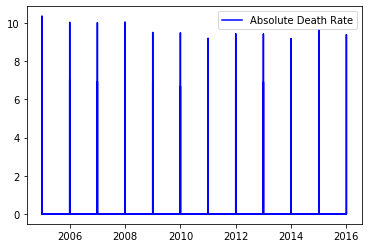

In [78]:
# CELL 31 by Mike Grad
# Plot Total Deaths for Brazil by Year

years = brazil_no_nans_df["Year"]

# DEBUG!! -- KeyError: 'Total Crude Death Rate'
bz_total_deaths = brazil_no_nans_df["Total Crude Death Rate"]

# Plot the world average as a line chart
plt.plot(years, bz_total_deaths, color="blue", label="Absolute Death Rate" )

# Create a legend for our chart
plt.legend()

# Show the chart
plt.show()

In [ ]:
# CELL 32 by Mike Grad
# Plot top 10 causes of all deaths for Brazil for last year of data